In [2]:
import zipfile
import os

zip_path = "archive.zip"
extract_dir = "unzipped_files"

os.makedirs(extract_dir, exist_ok= True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("files extracted to:", extract_dir)


files extracted to: unzipped_files


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE

In [5]:
df = pd.read_csv("unzipped_files/Student_Marks.csv")
df.head(99)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
94,8,3.919,24.451
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [8]:
x=df[["number_courses","time_study"]]
y=df["Marks"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [75]:
y_test_pred= reg.predict(x_test)
print(y_test_pred)
y_train_pred= reg.predict(x_train)
print(y_train_pred)

[ 8.53602    27.7351677  17.26125916 21.50987508  2.88018967 42.51543273
 33.02332944  7.33607503 48.55731119 23.19372884 38.42713475 27.47850719
 45.99027189 21.60461834 20.58353326 28.45188172 13.2361775  19.96931539
 39.55535147 24.1500795 ]
[10.57127754 23.43648288 46.64916412 15.75542503  9.66651386 28.94657957
 31.25544027 32.72275361 40.33368251 36.5837221   6.01213698 48.71990626
 28.35553915  7.88555848 26.26321887 31.22467237 45.58104633 48.8270379
 24.81436627 37.87377485  0.87805838 13.5120578  23.35556487 18.84033963
 49.74410874 23.34089935 40.40616981  1.11541789 41.03808937 21.30564182
 22.33447979 47.89378346 22.86693938 20.57426229  3.01353493 40.14335572
  8.07748458 39.23935108 32.09395144  4.51936906 38.21438956  8.92206812
 29.8844695  47.05838969  2.89097874 41.05890846 12.63510705 18.2993681
 14.23568444 40.19114748 29.0614641   7.36768319 23.28080043 39.00123253
  7.46250767 25.28141362 25.89251409 28.74858111 23.54125617 39.89368905
  6.13848841 43.27218563 19

In [83]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_pred)
print("R2 score(train): ",train_score)
test_score=r2_score(y_test, y_test_pred)
print("R2 score(test): ",test_score)

R2 score(train):  0.9403650041455023
R2 score(test):  0.9379348542894724


In [79]:
from sklearn.metrics import mean_squared_error as MSE
RMSE1 = np.sqrt(MSE(y_train, y_train_pred))
RMSE2 = np.sqrt(MSE(y_test,y_test_pred))              
print("RMSE (train): ",RMSE1)
print("RMSE (test): ",RMSE2)


RMSE (train):  3.5419854371529453
RMSE (test):  3.289982446600903


<Axes: ylabel='Marks'>

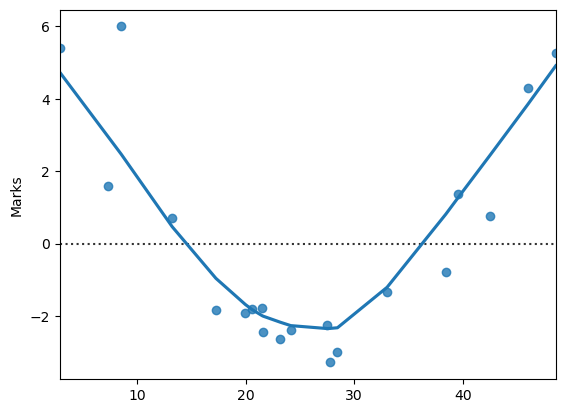

In [77]:
sns.residplot(x=y_pred,y=y_test, lowess=True)

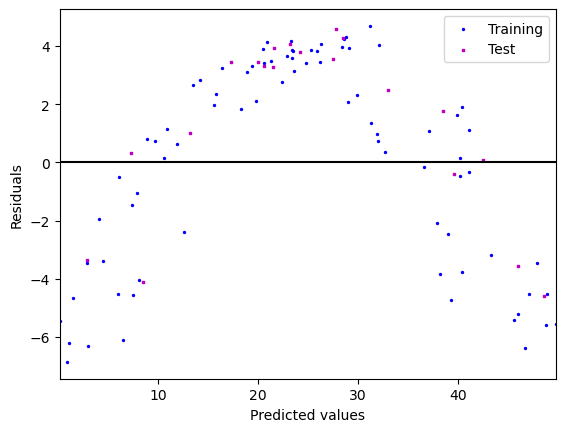

In [78]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, s=2, marker='o', c='b', label='Training')    
    plt.scatter(y_test_pred, y_test_pred - y_test, s=2, marker='s', c='m', label='Test') 
    xmin = min(y_train_pred.min(), y_test_pred.min())
    xmax = max(y_train_pred.max(), y_test_pred.max())
    plt.hlines(y=0, xmin=xmin, xmax=xmax, color='black')    

    plt.xlim(xmin, xmax)
   
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()


plot_residuals(y_train_pred, y_train, y_test_pred, y_test)

In [74]:
print("coefficient: ", reg.coef_)
print("intercept: ", reg.intercept_)

coefficient:  [1.81180449 5.39453433]
intercept:  -6.887034877371775
